In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import display
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/final_2015_v19")
data.head()

LeaseID  PriorLeaseID  NextLeaseID  PropertyID  ResidentHouseholdID  \
0   3744.0        3404.0          NaN   1003904.0               2466.0   
1   3746.0           NaN          NaN   1003904.0               2684.0   
2   3748.0           NaN          NaN   1003904.0               2686.0   
3   3751.0        3409.0       4079.0   1003904.0                400.0   
4   3755.0           NaN          NaN   1003904.0               2697.0   

   UnitID      LeaseUID ResidentHouseholdUID      UnitUID L_LeaseTermName  \
0   161.0  1003904-3744         1003904-2466  1003904-161  12 month lease   
1   180.0  1003904-3746         1003904-2684  1003904-180  14 month lease   
2   190.0  1003904-3748         1003904-2686  1003904-190   6 month lease   
3    27.0  1003904-3751          1003904-400   1003904-27  12 month lease   
4   107.0  1003904-3755         1003904-2697  1003904-107  14 month lease   

           L_Status  L_PeriodRentAmount L_BeginDate  L_EndDate  \
0   Former resident              1845.0  2015-01-16 2016-01-11   
1   Former resident              1103.0  2015-01-08 2016-02-28   
2   Former resident              2152.0  2015-01-08 2015-06-14   
3  Current resident              1136.0  2015-01-24 2016-01-17   
4   Former resident              1232.0  2015-01-01 2015-10-04   

  L_ScheduledMoveOutDate L_ScheduledMoveInDate L_MoveInDate L_MoveOutDate  \
0             2016-01-16            2013-12-14   2013-12-14    2016-01-16   
1             2015-07-30            2015-01-08   2015-01-08    2015-07-30   
2             2015-06-20            2015-01-08   2015-01-08    2015-06-20   
3                    NaT            2003-09-11   2003-09-11           NaT   
4             2015-06-05            2015-01-01   2015-01-01    2015-06-05   

  L_MoveOutCategory                  L_MoveOutReason L_NoticeOnDate  \
0  Lifestyle change                     Renting home     2015-12-03   
1  Lifestyle change              Employment transfer     2015-07-01   
2  Lifestyle change                      Moving home     2015-05-20   
3              None                             None            NaT   
4  Lifestyle change  Moving out of area/town/country     2015-05-04   

  L_MonthToMonthDate  L_CancelRejectIndicator L_CancelDate  L_MonthlyRent  \
0         2016-01-12                    False          NaT         1155.0   
1                NaT                    False          NaT         1103.0   
2         2015-06-15                    False          NaT         1478.0   
3                NaT                    False          NaT         1136.0   
4                NaT                    False          NaT         1232.0   

   L_InvalidFlag  L_CancelFlag  L_DataInclusionFlag L_NextBeginDate  \
0              0             0                    1             NaT   
1              0             0                    1             NaT   
2              0             0                    1             NaT   
3              0             0                    1      2016-01-18   
4              0             0                    1             NaT   

   L_Duration L_DurationBin  RH_LeaseIndex  U_LeaseIndex  RH_LeaseIndexRev  \
0          12   6-12 months            2.0          13.0               1.0   
1          13     1-3 years            1.0          16.0               1.0   
2           5    3-6 months            1.0          14.0               1.0   
3          12   6-12 months           13.0          15.0               7.0   
4           9   6-12 months            1.0          17.0               1.0   

   U_LeaseIndexRev  RH_FirstLeaseFlag  U_FirstLeaseFlag  RH_LatestLeaseFlag  \
0              8.0                  0                 0                   1   
1              6.0                  1                 0                   1   
2              9.0                  1                 0                   1   
3              7.0                  0                 0                   0   
4              9.0                  1                 

In [6]:
data.shape

(239551, 210)

In [8]:
columns_v3=pd.read_csv("C:/Users/Hp/OneDrive/Desktop/churn model/columns_v3.csv")

In [9]:
list1=[]
for i in range(len(columns_v3)):
    if columns_v3['in_flag'][i]==0:
        list1.append(columns_v3['name'][i])
        
list1

['LeaseID',
 'PriorLeaseID',
 'NextLeaseID',
 'PropertyID',
 'ResidentHouseholdID',
 'UnitID',
 'ResidentHouseholdUID',
 'UnitUID',
 'L_LeaseTermName',
 'L_Status',
 'L_PeriodRentAmount',
 'L_BeginDate',
 'L_EndDate',
 'L_ScheduledMoveOutDate',
 'L_ScheduledMoveInDate',
 'L_MoveInDate',
 'L_MoveOutDate',
 'L_MoveOutCategory',
 'L_MoveOutReason',
 'L_NoticeOnDate',
 'L_MonthToMonthDate',
 'L_CancelRejectIndicator',
 'L_CancelDate',
 'L_InvalidFlag',
 'L_CancelFlag',
 'L_DataInclusionFlag',
 'L_NextBeginDate',
 'RH_LeaseIndexRev',
 'U_LeaseIndexRev',
 'RH_FirstLeaseFlag',
 'U_FirstLeaseFlag',
 'RH_LatestLeaseFlag',
 'U_LatestLeaseFlag',
 'L_EvictionFlag',
 'L_ActiveFlag',
 'L_ModelInclusionFlag',
 'L_RenewalFlag',
 'L_TransferFlag',
 'L_EndYear',
 'L_ActualBeginDate',
 'L_ActualEndDate',
 'L_ActualBeginQuarter',
 'L_ActualBeginYear',
 'L_ActualEndYear',
 'L_ActualDuration',
 'L_ActualDurationBin',
 'L_MTMFlag',
 'L_MTMDuration',
 'EI_Experience_0_Future Resident',
 'EI_Experience_1_Trans

In [10]:
data=data.drop(list1,axis=1)

In [11]:
data.shape

(239551, 134)

In [12]:
df_train=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_train")
df_test=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_test")
df_valid=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_valid")

In [13]:
df_train.head()

LeaseUID  L_MonthlyRent  L_Duration  RH_LeaseIndex  U_LeaseIndex  \
0  1027515-13523         2272.0          12              1             7   
1  1023394-23196         2374.0          12              6            10   
2      4499308-8         1206.0          11              1             1   
3  1310609-22395         2346.0          12              1             9   
4  2335216-33429         1385.0          12              9             9   

   L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
0            1               2016              -1.0           -1.000000   
1            0               2017            2296.0            0.033972   
2            0               2018              -1.0           -1.000000   
3            0               2017              -1.0           -1.000000   
4            0               2018            2962.0           -0.532411   

   EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
0                      -1.0               -1.0              -1.0   
1                      -1.0               -1.0              -1.0   
2                      -1.0               -1.0              -1.0   
3                      -1.0               -1.0              -1.0   
4                      -1.0               -1.0              -1.0   

   EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
0              -1.0                        -1.0              -1.0   
1              -1.0                        -1.0              -1.0   
2              -1.0                        -1.0              -1.0   
3               8.0                        -1.0               8.0   
4              -1.0                        -1.0              -1.0   

   EI_NPS_6_9 Month  EI_NPS_7_Mid Lease Maintenance  EI_NPS_8_12 Month  \
0              -1.0                            -1.0               -1.0   
1              -1.0                            -1.0               -1.0   
2              -1.0                            -1.0               -1.0   
3              -1.0                             9.0               -1.0   
4              -1.0                            -1.0               -1.0   

   EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
0               -1.0                -1.0               -1.0   
1               -1.0                -1.0               -1.0   
2               -1.0                -1.0               -1.0   
3               -1.0                -1.0               -1.0   
4               -1.0                -1.0               -1.0   

   EI_NPS_12_Move Out  EI_NumSurveys  EI_NPS_X_First Score  \
0                -1.0              0                  -1.0   
1                -1.0              0                  -1.0   
2                -1.0              0                  -1.0   
3                -1.0              3                   8.0   
4                -1.0              0                  -1.0   

   EI_NPS_X_Latest Score  EI_NPS_Min Score  EI_NPS_Max Score  \
0                   -1.0              -1.0              -1.0   
1                   -1.0              -1.0              -1.0   
2                   -1.0              -1.0              -1.0   
3                    3.0               3.0               9.0   
4                   -1.0              -1.0              -1.0   

   EI_NPS_Avg Score  EI_NPS_Growth  EI_NPS_PercGrowth  RI_ParkingFlag  \
0              -1.0           -1.0             -1.000               0   
1              -1.0           -1.0             -1.000               0   
2              -1.0           -1.0             -1.000               0   
3               7.0           -5.0             -0.625               0   
4              -1.0           -1.0             -1.000               0   

   SR_NumRequests  SR_NumSubRequests  SR_NumSubRequestsFirstWeek  \
0               7                  7                           1   
1               3                  3                           1   
2              15                 14               

In [14]:
train_data_v19 = data.loc[data["LeaseUID"].isin(df_train["LeaseUID"])].reset_index(drop=True)
train_data_v19.head()

LeaseUID  L_MonthlyRent  L_Duration L_DurationBin  RH_LeaseIndex  \
0  1003904-3746         1103.0          13     1-3 years            1.0   
1  1003904-3751         1136.0          12   6-12 months           13.0   
2  1003904-3756         1382.0          12   6-12 months            1.0   
3  1003904-3759         1135.0          14     1-3 years            1.0   
4  1003904-3766         1405.0          12   6-12 months            2.0   

   U_LeaseIndex  L_ChurnFlag  L_PrevRentAmount  L_PercRentIncrease  \
0          16.0            1               NaN                 NaN   
1          15.0            0            1103.0            0.029918   
2          14.0            0               NaN                 NaN   
3          13.0            1               NaN                 NaN   
4          11.0            0            1364.0            0.030059   

   EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
0                       NaN                NaN               NaN   
1                       NaN                NaN               NaN   
2                       NaN                NaN               NaN   
3                       NaN                NaN               NaN   
4                       NaN                NaN               NaN   

   EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
0               NaN                         NaN               NaN   
1               NaN                         NaN               NaN   
2               NaN                         NaN               NaN   
3               NaN                         NaN               NaN   
4               NaN                         NaN               NaN   

   EI_NPS_6_Mid Lease Maintenance  EI_NPS_7_9 Month  EI_NPS_8_12 Month  \
0                             NaN               NaN                NaN   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN                NaN   
4                             NaN               NaN                NaN   

   EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
0                NaN                 NaN                NaN   
1                NaN                 NaN                NaN   
2                NaN                 NaN                NaN   
3                NaN                 NaN                NaN   
4                NaN                 NaN                NaN   

   EI_NPS_12_Move Out  EI_NumSurveys  EI_NPS_X_First Score  \
0                 NaN            NaN                   NaN   
1                 NaN            NaN                   NaN   
2                 NaN            NaN                   NaN   
3                 NaN            NaN                   NaN   
4                 NaN            NaN                   NaN   

   EI_NPS_X_Latest Score  EI_NPS_Min Score  EI_NPS_Max Score  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               NaN   
3                    NaN               NaN               NaN   
4                    NaN               NaN               NaN   

   EI_NPS_Avg Score  EI_NPS_Growth  EI_NPS_PercGrowth  RI_ParkingFlag  \
0               NaN            NaN                NaN             0.0   
1               NaN            NaN                NaN             0.0   
2               NaN            NaN                NaN             0.0   
3               NaN            NaN                NaN             0.0   
4               NaN            NaN                NaN             0.0   

   RI_ParkingFlag_PERM  RI_ParkingFlag_RESERVED  RI_ParkingFlag_UNRESERVED  \
0                  0.0                      0.0                        0.0   
1                  0.0                      0.0                        0.0   
2                  0.0                      0.0         

In [15]:
test_data_v19 = data.loc[data["LeaseUID"].isin(df_test["LeaseUID"])].reset_index(drop=True)
valid_data_v19 = data.loc[data["LeaseUID"].isin(df_valid["LeaseUID"])].reset_index(drop=True)

In [16]:
data1 = pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/final_2015_v19")
data1.head()

LeaseID  PriorLeaseID  NextLeaseID  PropertyID  ResidentHouseholdID  \
0   3744.0        3404.0          NaN   1003904.0               2466.0   
1   3746.0           NaN          NaN   1003904.0               2684.0   
2   3748.0           NaN          NaN   1003904.0               2686.0   
3   3751.0        3409.0       4079.0   1003904.0                400.0   
4   3755.0           NaN          NaN   1003904.0               2697.0   

   UnitID      LeaseUID ResidentHouseholdUID      UnitUID L_LeaseTermName  \
0   161.0  1003904-3744         1003904-2466  1003904-161  12 month lease   
1   180.0  1003904-3746         1003904-2684  1003904-180  14 month lease   
2   190.0  1003904-3748         1003904-2686  1003904-190   6 month lease   
3    27.0  1003904-3751          1003904-400   1003904-27  12 month lease   
4   107.0  1003904-3755         1003904-2697  1003904-107  14 month lease   

           L_Status  L_PeriodRentAmount L_BeginDate  L_EndDate  \
0   Former resident              1845.0  2015-01-16 2016-01-11   
1   Former resident              1103.0  2015-01-08 2016-02-28   
2   Former resident              2152.0  2015-01-08 2015-06-14   
3  Current resident              1136.0  2015-01-24 2016-01-17   
4   Former resident              1232.0  2015-01-01 2015-10-04   

  L_ScheduledMoveOutDate L_ScheduledMoveInDate L_MoveInDate L_MoveOutDate  \
0             2016-01-16            2013-12-14   2013-12-14    2016-01-16   
1             2015-07-30            2015-01-08   2015-01-08    2015-07-30   
2             2015-06-20            2015-01-08   2015-01-08    2015-06-20   
3                    NaT            2003-09-11   2003-09-11           NaT   
4             2015-06-05            2015-01-01   2015-01-01    2015-06-05   

  L_MoveOutCategory                  L_MoveOutReason L_NoticeOnDate  \
0  Lifestyle change                     Renting home     2015-12-03   
1  Lifestyle change              Employment transfer     2015-07-01   
2  Lifestyle change                      Moving home     2015-05-20   
3              None                             None            NaT   
4  Lifestyle change  Moving out of area/town/country     2015-05-04   

  L_MonthToMonthDate  L_CancelRejectIndicator L_CancelDate  L_MonthlyRent  \
0         2016-01-12                    False          NaT         1155.0   
1                NaT                    False          NaT         1103.0   
2         2015-06-15                    False          NaT         1478.0   
3                NaT                    False          NaT         1136.0   
4                NaT                    False          NaT         1232.0   

   L_InvalidFlag  L_CancelFlag  L_DataInclusionFlag L_NextBeginDate  \
0              0             0                    1             NaT   
1              0             0                    1             NaT   
2              0             0                    1             NaT   
3              0             0                    1      2016-01-18   
4              0             0                    1             NaT   

   L_Duration L_DurationBin  RH_LeaseIndex  U_LeaseIndex  RH_LeaseIndexRev  \
0          12   6-12 months            2.0          13.0               1.0   
1          13     1-3 years            1.0          16.0               1.0   
2           5    3-6 months            1.0          14.0               1.0   
3          12   6-12 months           13.0          15.0               7.0   
4           9   6-12 months            1.0          17.0               1.0   

   U_LeaseIndexRev  RH_FirstLeaseFlag  U_FirstLeaseFlag  RH_LatestLeaseFlag  \
0              8.0                  0                 0                   1   
1              6.0                  1                 0                   1   
2              9.0                  1                 0                   1   
3              7.0                  0                 0                   0   
4              9.0                  1                 

In [17]:
oot_data = data1.loc[data1["L_ActualEndDate"].between("2021-06-01", "2021-10-31")].reset_index(drop=True)

In [18]:
oot_data=oot_data.drop(list1,axis=1)

In [19]:
columns_v3

name  in_flag   dtype  \
0                      LeaseID      0.0  object   
1                 PriorLeaseID      0.0  object   
2                  NextLeaseID      0.0  object   
3                   PropertyID      0.0  object   
4          ResidentHouseholdID      0.0  object   
..                         ...      ...     ...   
269            RH_HoHAge_gt_60      NaN     int   
270  L_AvgMonthlyRent_Property      1.0   float   
271        RI_ParkingFlag_PERM      1.0     int   
272    RI_ParkingFlag_RESERVED      1.0     int   
273  RI_ParkingFlag_UNRESERVED      1.0     int   

                                           description control_score  \
0                                                  NaN        #NAME?   
1                                                  NaN        #NAME?   
2                                                  NaN        #NAME?   
3                                                  NaN        #NAME?   
4                                                  NaN        #NAME?   
..                                                 ...           ...   
269  Flag to indicate if the age of head of househo...             0   
270  Average rent of similar lease/unit in the prop...             3   
271  Flag to indicate if a permanent parking was as...        #NAME?   
272  Flag to indicate if a reserved parking was ass...        #NAME?   
273  Flag to indicate if an unreserved parking was ...        #NAME?   

     top50_flag  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
269         1.0  
270         1.0  
271         1.0  
272         1.0  
273         1.0  

[274 rows x 6 columns]

In [20]:
df_train.describe()

L_MonthlyRent     L_Duration  RH_LeaseIndex   U_LeaseIndex  \
count  116914.000000  116914.000000  116914.000000  116914.000000   
mean     2569.743164      12.393383       2.302915       7.634629   
std      1998.737427       0.958986       1.904845       2.937707   
min         0.000000      11.000000       1.000000       1.000000   
25%      1496.000000      12.000000       1.000000       6.000000   
50%      2076.000000      12.000000       2.000000       8.000000   
75%      3011.750000      13.000000       3.000000      10.000000   
max    118795.000000      15.000000      15.000000      22.000000   

         L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
count  116914.000000      116914.000000     116914.000000       116914.000000   
mean        0.444609        2017.270695       1471.677002           -0.510602   
std         0.496924           1.566767       2271.779297            0.525136   
min         0.000000        2015.000000         -1.000000           -1.000000   
25%         0.000000        2016.000000         -1.000000           -1.000000   
50%         0.000000        2017.000000        960.000000           -0.716035   
75%         1.000000        2019.000000       2286.000000            0.025137   
max         1.000000        2021.000000     137380.000000            1.000818   

       EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
count             116914.000000      116914.000000     116914.000000   
mean                  -0.261549          -0.926168          0.149045   
std                    2.672065           0.844877          3.186219   
min                   -1.000000          -1.000000         -1.000000   
25%                   -1.000000          -1.000000         -1.000000   
50%                   -1.000000          -1.000000         -1.000000   
75%                   -1.000000          -1.000000         -1.000000   
max                   10.000000          10.000000         10.000000   

       EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
count     116914.000000               116914.000000     116914.000000   
mean           0.598664                    0.731457          0.501905   
std            3.553236                    3.775021          3.437649   
min           -1.000000                   -1.000000         -1.000000   
25%           -1.000000                   -1.000000         -1.000000   
50%           -1.000000                   -1.000000         -1.000000   
75%           -1.000000                   -1.000000         -1.000000   
max           10.000000                   10.000000         10.000000   

       EI_NPS_6_9 Month  EI_NPS_7_Mid Lease Maintenance  EI_NPS_8_12 Month  \
count     116914.000000                   116914.000000           116914.0   
mean          -0.997810                       -0.423973               -1.0   
std            0.138648                        2.300855                0.0   
min           -1.000000                       -1.000000               -1.0   
25%           -1.000000                       -1.000000               -1.0   
50%           -1.000000                       -1.000000               -1.0   
75%           -1.000000                       -1.000000               -1.0   
max           10.000000                       10.000000               -1.0   

       EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
count           116914.0            116914.0      116914.000000   
mean                -1.0                -1.0          -0.974773   
std                  0.0                 0.0           0.482759   
min                 -1.0                -1.0          -1.000000   
25%                 -1.0                -1.0          -1.000000   
50%                 -1.0                -1.0          -1.000000   
75%                 -1.0                -1.0          -1.000000   
max                 -1.0                -1.0          10.000000   

       EI_NPS_12_Move Out  EI_NumSurveys 

In [21]:
df_train.shape

(116914, 174)

In [22]:
df_train.isnull().sum()

LeaseUID               0
L_MonthlyRent          0
L_Duration             0
RH_LeaseIndex          0
U_LeaseIndex           0
                      ..
Zip_ENC1               0
Market_ENC1            0
Class Status_ENC1      0
Building Type_ENC1     0
Urban/Suburban_ENC1    0
Length: 174, dtype: int64

In [23]:
!pip install sidetable
import sidetable

In [24]:
df_train.stb.missing()

missing   total    percent
RH_DistanceFromWork           61071  116914  52.235831
SR_NumResolutions_PerMonth        0  116914   0.000000
AX_Effective_Rent                 0  116914   0.000000
AX_Effective_Rent_Growth          0  116914   0.000000
L_AvgMonthlyRent                  0  116914   0.000000
...                             ...     ...        ...
RH_NumAdults                      0  116914   0.000000
RH_NumChildren                    0  116914   0.000000
RH_NumMaleAdults                  0  116914   0.000000
RH_NumFemaleAdults                0  116914   0.000000
Urban/Suburban_ENC1               0  116914   0.000000

[174 rows x 3 columns]

In [25]:
df_train.fillna(data['RH_DistanceFromWork'].median(),inplace = True)
df_valid.fillna(data['RH_DistanceFromWork'].median(),inplace = True)
df_test.fillna(data['RH_DistanceFromWork'].median(),inplace = True)

In [26]:
df_train.stb.missing()

missing   total  percent
LeaseUID                          0  116914      0.0
SR_NumResolutions_PerMonth        0  116914      0.0
AX_Effective_Rent                 0  116914      0.0
AX_Effective_Rent_Growth          0  116914      0.0
L_AvgMonthlyRent                  0  116914      0.0
...                             ...     ...      ...
RH_NumAdults                      0  116914      0.0
RH_NumChildren                    0  116914      0.0
RH_NumMaleAdults                  0  116914      0.0
RH_NumFemaleAdults                0  116914      0.0
Urban/Suburban_ENC1               0  116914      0.0

[174 rows x 3 columns]

In [27]:

categorical_na_columns1 = df_train.select_dtypes('int64').columns
categorical_na_columns2 = df_train.select_dtypes('object').columns
categorical_na_columns3 = df_train.select_dtypes('float64').columns

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116914 entries, 0 to 116913
Columns: 174 entries, LeaseUID to Urban/Suburban_ENC1
dtypes: float32(40), float64(52), int32(73), int64(8), object(1)
memory usage: 104.8+ MB


In [29]:
print(len(categorical_na_columns1))
print(len(categorical_na_columns2))
print(len(categorical_na_columns3))

8
1
52


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

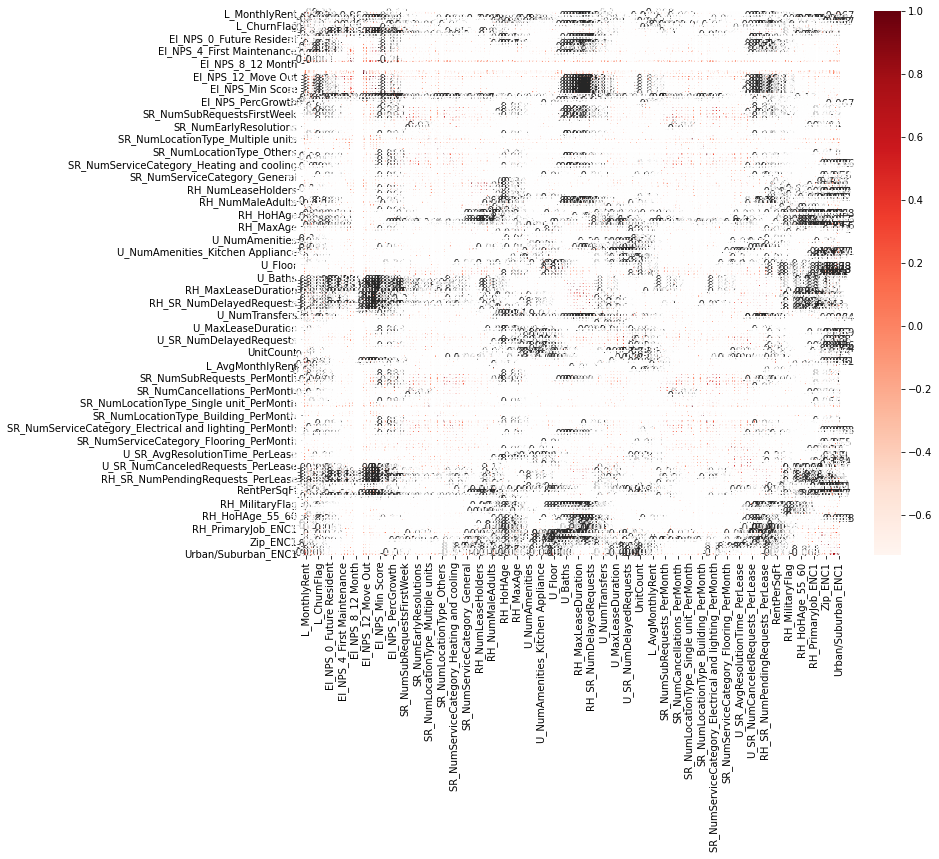

In [32]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
X_train=df_train.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_train=df_train["L_ChurnFlag"]

In [29]:
X_test=df_test.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_test=df_test["L_ChurnFlag"]

In [30]:
X_valid=df_valid.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_valid=df_valid["L_ChurnFlag"]

## LOGISTIC REGRESSION

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [76]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [39]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10053  3861]
 [ 5204  5935]]


0.6381670857781503

In [87]:
#standard scaling
X_valid = sc.transform(X_valid)

### Logistic reg (df_train df_test)

In [81]:
classifier = LogisticRegression(random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)


train accuracy: 
Accuracy Score :  64.46
ROC AUC score :  63.4
Precision score :  61.43
Recall score :  53.89
 
test accuracy: 
Accuracy Score :  63.82
ROC AUC score :  62.77
Precision score :  60.59
Recall score :  53.28


## K NEAREST NEIGHBOUR

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9489 4425]
 [5803 5336]]


0.5917454995409731

### KNN (df_train df_test)

In [82]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  59.17
ROC AUC score :  58.05
Precision score :  54.67
Recall score :  47.9


In [31]:
!pip install xgboost

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Gradient boosting

In [43]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=12)
# fit the training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8716 5198]
 [5203 5936]]


0.5848401389055203

### GB (df_train df_test)

In [89]:
# initialize the GradientBoosting
classifier = GradientBoostingClassifier(random_state=12)
# fit the training data
classifier.fit(X_train, y_train)
# predict the testing data
Y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  66.44
ROC AUC score :  64.88
Precision score :  65.91
Recall score :  50.8
 
test accuracy: 
Accuracy Score :  67.57
ROC AUC score :  66.09
Precision score :  67.26
Recall score :  52.73


# XGB Classifier

In [42]:
# Initialize the XGBoost
model = XGBClassifier(random_state=12)
# fit the  training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[8716 5198]
 [5203 5936]]


0.5848401389055203

### XGB (df_train df_test)

In [85]:
# Initialize the XGBoost
model = XGBClassifier(random_state=12)
# fit the  training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  58.48
ROC AUC score :  57.97
Precision score :  53.31
Recall score :  53.29


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8716 5198]
 [5203 5936]]


0.5848401389055203

### Decision Tree (df_train df_test)

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  58.48
ROC AUC score :  57.97
Precision score :  53.31
Recall score :  53.29


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10889  3025]
 [ 6306  4833]]


0.6275495948588992

### Random Forest (df_train df_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  62.75
ROC AUC score :  60.82
Precision score :  61.5
Recall score :  43.39


In [46]:
!pip install lightgbm

In [47]:
import lightgbm

In [88]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  70.0
ROC AUC score :  68.59
Precision score :  70.57
Recall score :  55.8
 
test accuracy: 
Accuracy Score :  67.57
ROC AUC score :  66.09
Precision score :  67.26
Recall score :  52.73


# PCA

In [91]:
from sklearn.decomposition import PCA
# Initialize pca preserving 95% of the variability in data
pca = PCA(n_components=0.95,random_state=12)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)

In [93]:
X_train_pca.shape,X_test_pca.shape

((116914, 78), (25053, 78))

In [94]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
y_pred_train=classifier.predict(X_train_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  68.26
ROC AUC score :  66.95
Precision score :  67.55
Recall score :  55.08
 
test accuracy: 
Accuracy Score :  63.99
ROC AUC score :  62.6
Precision score :  61.72
Recall score :  50.03


In [95]:
!pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=4e10793f4f95bce2d2491fc72e3ee2b3e8adf4153d7a22e2b2797a34a24cf2db
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
